In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

[Text(0.5, 0, 'SOC [-]'), Text(0, 0.5, 'Probability of Action [-]'), None]

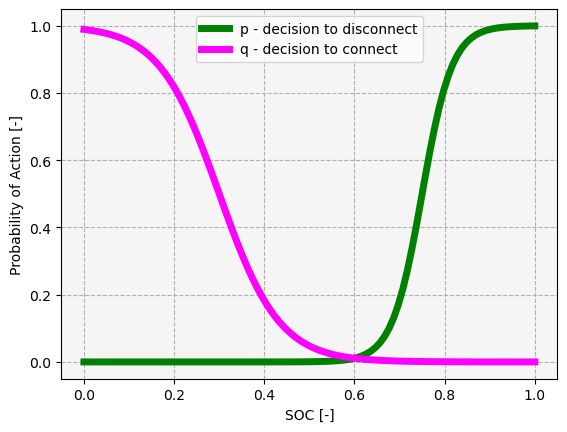

In [96]:
fun = lambda x, k: 1 / (1 + np.exp(-k[0] * (x - k[1])))

fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 1, 100)

ax.plot(x, fun(x, [30, .75]),
       color = 'green', lw=5, label = 'p - decision to disconnect')

ax.plot(x, fun(-x, [15, -.3]),
       color = 'magenta', lw=5, label = 'q - decision to connect')

ax.legend()
ax.grid(ls = '--')

ax.set(**{
    'xlabel': 'SOC [-]',
    'ylabel': 'Probability of Action [-]',
    'facecolor': 'whitesmoke',
})

[Text(0.5, 0, 'SOC [-]'), Text(0, 0.5, 'Probability of Action [-]'), None]

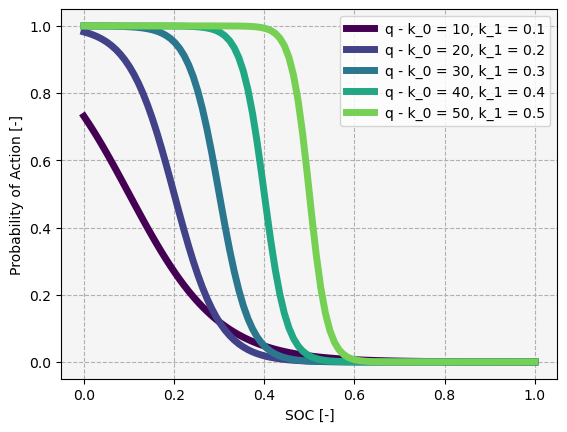

In [105]:
fun = lambda x, k: 1 / (1 + np.exp(-k[0] * (x - k[1])))

n = 5

k0 = np.linspace(10, 50, 5)
k1 = np.linspace(.1, .5, 5)

fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 1, 100)

cmap = src.figures.colormap('viridis')

for idx in range(n):

# ax.plot(x, fun(x, [30, .75]),
#        color = 'green', lw=5, label = 'p - decision to disconnect')

    ax.plot(x, fun(-x, [k0[idx], -k1[idx]]),
        color = cmap(idx / n * .99), lw=5,
        label = f'q - k_0 = {k0[idx]:.0f}, k_1 = {k1[idx]:.1f}'
           )

ax.legend()
ax.grid(ls = '--')

ax.set(**{
    'xlabel': 'SOC [-]',
    'ylabel': 'Probability of Action [-]',
    'facecolor': 'whitesmoke',
})

[Text(0.5, 0, 'SOC [-]'), Text(0, 0.5, 'Probability of Action [-]'), None]

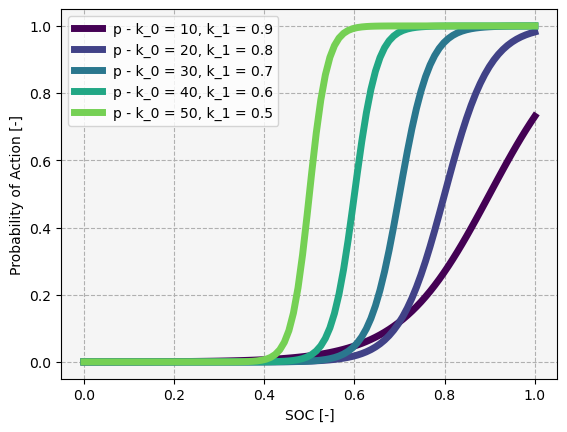

In [107]:
fun = lambda x, k: 1 / (1 + np.exp(-k[0] * (x - k[1])))

n = 5

k0 = np.linspace(10, 50, 5)
k1 = 1 - np.linspace(.1, .5, 5)

fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 1, 100)

cmap = src.figures.colormap('viridis')

for idx in range(n):

# ax.plot(x, fun(x, [30, .75]),
#        color = 'green', lw=5, label = 'p - decision to disconnect')

    ax.plot(x, fun(x, [k0[idx], k1[idx]]),
        color = cmap(idx / n * .99), lw=5,
        label = f'p - k_0 = {k0[idx]:.0f}, k_1 = {k1[idx]:.1f}'
           )

ax.legend()
ax.grid(ls = '--')

ax.set(**{
    'xlabel': 'SOC [-]',
    'ylabel': 'Probability of Action [-]',
    'facecolor': 'whitesmoke',
})

In [155]:
np.log(1 / x - 1), x

(array([        inf,  4.58496748,  3.8815638 ,  3.4657359 ,  3.16758253,
         2.93385687,  2.74084002,  2.57587843,  2.43141796,  2.30258509,
         2.18605128,  2.07944154,  1.98100147,  1.88939794,  1.80359393,
         1.7227666 ,  1.64625189,  1.5735059 ,  1.5040774 ,  1.43758766,
         1.37371558,  1.31218639,  1.25276297,  1.19523912,  1.13943428,
         1.08518927,  1.0323629 ,  0.98082925,  0.93047537,  0.88119941,
         0.83290912,  0.7855205 ,  0.73895672,  0.69314718,  0.64802675,
         0.60353502,  0.55961579,  0.51621647,  0.4732877 ,  0.43078292,
         0.38865799,  0.34687094,  0.30538165,  0.26415158,  0.22314355,
         0.18232156,  0.14165052,  0.10109612,  0.06062462,  0.02020271,
        -0.02020271, -0.06062462, -0.10109612, -0.14165052, -0.18232156,
        -0.22314355, -0.26415158, -0.30538165, -0.34687094, -0.38865799,
        -0.43078292, -0.4732877 , -0.51621647, -0.55961579, -0.60353502,
        -0.64802675, -0.69314718, -0.73895672, -0.7

[Text(0.5, 0, 'SOC [-]'), Text(0, 0.5, 'Probability of Action [-]'), None]

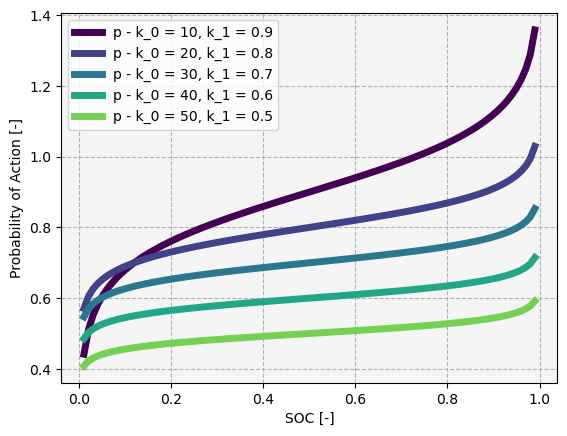

In [157]:
fun = lambda x, k: k[1] - np.log(1 / x - 1) / k[0]

n = 5

k0 = np.linspace(10, 50, 5)
k1 = 1 - np.linspace(.1, .5, 5)

fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 1, 100)

cmap = src.figures.colormap('viridis')

for idx in range(n):

# ax.plot(x, fun(x, [30, .75]),
#        color = 'green', lw=5, label = 'p - decision to disconnect')

    ax.plot(x, fun(x, [k0[idx], k1[idx]]),
        color = cmap(idx / n * .99), lw=5,
        label = f'p - k_0 = {k0[idx]:.0f}, k_1 = {k1[idx]:.1f}'
           )

ax.legend()
ax.grid(ls = '--')

ax.set(**{
    'xlabel': 'SOC [-]',
    'ylabel': 'Probability of Action [-]',
    'facecolor': 'whitesmoke',
})

In [146]:
# Generating random graph
deep_reload(src)

seed = np.random.randint(0, sys.maxsize)
seed = 15893673
print(seed)

n_nodes = 50
n_targets = 15
s = 15

scale = (100, 100)
link_bounds = (1e-6, np.inf)
link_speeds = [35, 55, 90, 105]

minimum_path_probability = .9

graph = src.graph.random_graph(
    n_nodes,
    scale,
    s = s,
    link_bounds = link_bounds,
    link_speeds = link_speeds,
    seed = seed,
)

rng = np.random.default_rng(seed)

target_nodes = list(rng.choice(graph.nodes, n_targets, replace = False))
# source_nodes = rng.choice(graph.nodes, (1, ), replace = False)

15893673


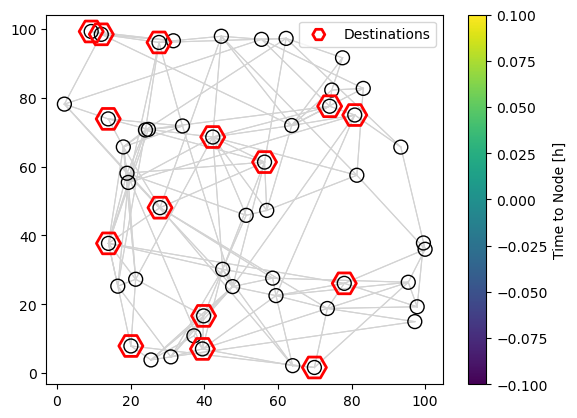

In [147]:
deep_reload(src)

fig = src.figures.dijkstra_output(
    graph, {}, [], target_nodes, {})

# fig.savefig('Document/figs/random_graph.png', bbox_inches = 'tight', dpi = 300)